In [1]:
# Description:  This program uses the Moving Average COnvergence/ Divergence(MACD) crossover
#               to determine when to buy and sell stock.

In [2]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from google.colab import files

uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [6]:
# Store the data into a df
df = pd.read_csv('AAPL.csv')
# Set the date to be the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

df

,Date,Open,High,Low,Close,Adj Close,Volume
2015-08-17,2015-08-17,116.040001,117.650002,115.500000,117.160004,108.269211,40884700
2015-08-18,2015-08-18,116.430000,117.440002,116.010002,116.500000,107.659302,34560700
2015-08-19,2015-08-19,116.099998,116.519997,114.680000,115.010002,106.282379,48286500
2015-08-20,2015-08-20,114.080002,114.349998,111.629997,112.650002,104.101456,68501600
2015-08-21,2015-08-21,110.430000,111.900002,105.650002,105.760002,97.734299,128275500
...,...,...,...,...,...,...,...
2020-08-10,2020-08-10,450.399994,455.100006,440.000000,450.910004,450.910004,53100900
2020-08-11,2020-08-11,447.880005,449.929993,436.429993,437.500000,437.500000,46975600
2020-08-12,2020-08-12,441.989990,453.100006,441.190002,452.040009,452.040009,41486200
2020-08-13,2020-08-13,457.720001,464.170013,455.709991,460.040009,460.040009,52520500


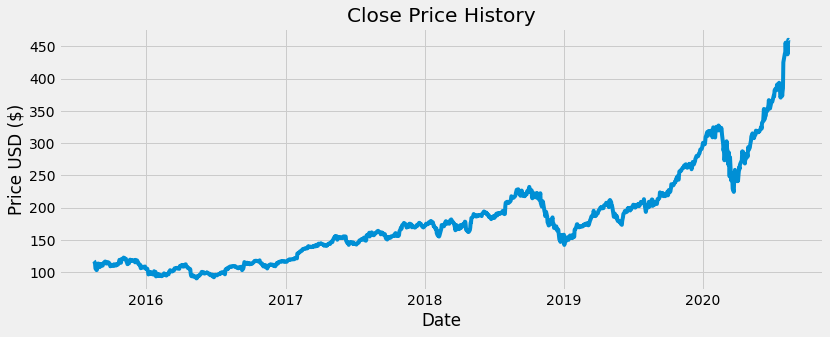

In [7]:
# Visually show the stock price

plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.show()

In [9]:
# Calculate the MAD and signal ine indicators
# Calculate the short term exponential moving average (EMA)
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponential moving average (EMA)
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
# Claculate the MACD line
MACD = ShortEMA - LongEMA
# Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

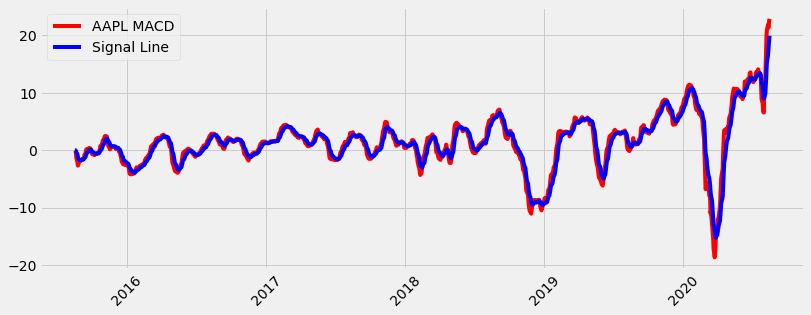

In [11]:
# Plot the chart
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, MACD, label ='AAPL MACD', color='red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()